## Import from NIST spectra

This Notebook is used to import spectra from the Nist database : http://webbook.nist.gov/chemistry/ 
The specrum is then stored in a file for further use in the DGA simulator

In [90]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys
import jcamp
import os
import urllib
import os
sys.path.append(r'C:\Data\Python\Characterisation_Report_scripts\src\analysis')
import functions

In [149]:
#url to spectrum
#acetone
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C67641&Index=9&Type=IR"   
#Butanone
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C78933&Index=7&Type=IR"
#Benzene
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C71432&Index=7&Type=IR"
#Toluene
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C108883&Index=8&Type=IR"
#p-xylene
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C106423&Index=9&Type=IR"
#ethyl-acetate
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C141786&Index=7&Type=IR"
#Pentan-2-one
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C107879&Index=1&Type=IR"
#Ethanol
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C64175&Index=8&Type=IR"
#2-Butene(E)
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C624646&Index=1&Type=IR"
#2-Butene(Z)
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C590181&Index=0&Type=IR"
#Hex-1-ene
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C592416&Index=1&Type=IR"
#Acetic acid
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C64197&Index=1&Type=IR"
#Heptane
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C142825&Index=1&Type=IR"
#Pentane
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C109660&Index=2&Type=IR"
#Butanol
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C71363&Index=8&Type=IR"
#2-Methyl-propan-1-ol
#url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C78831&Index=1&Type=IR"
#Mesitylene
url = "http://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C108678&Index=1&Type=IR"
#save_path
save_path=os.path.join(os.path.join(os.getcwd(), os.path.pardir),"spectral_files")
#file_name
file_name = "Mesitylene.jdx"

In [150]:
#download
urllib.urlretrieve(url, os.path.join(save_path,file_name))

('C:\\Data\\Python\\DGA_simulator\\jupyter_notebooks\\..\\spectral_files\\Mesitylene.jdx',
 <httplib.HTTPMessage instance at 0x0D635C38>)

In [151]:
#read JCAMP file
data = jcamp.JCAMP_reader(os.path.join(save_path,file_name))

In [166]:
nu = data["x"]
alpha = data["y"]
#caculate absorbance from transmittance data recalculate for 1ppm and 1m path length
partial_pressure = 15 #in Torr
path_length = 5 #in cm
#alpha=np.log10(1/data["y"])/partial_pressure*760*10**-6/path_length*100
#for mesitylene. calculation from 25ul liquid in 80cm^3 cell and 5cm path length
#alpha=np.log10(1/data["y"])/(25*10**-6*0.8637*1000/120.19*24.5/(80.0/1000))/5*100*10**-6

<IPython.core.display.Javascript object>


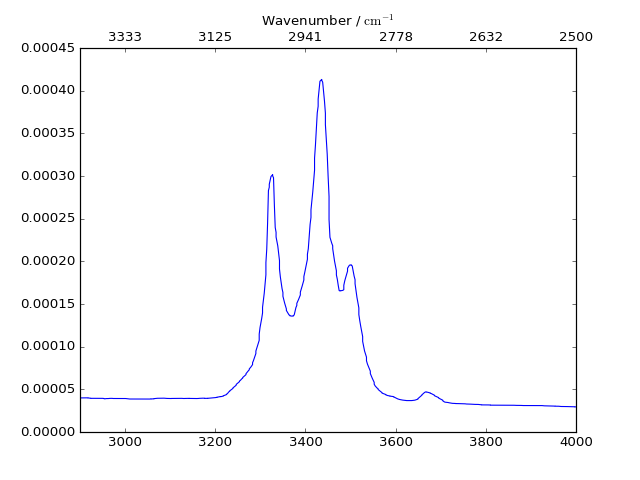

In [167]:
#plot spectrum
fig, ax=plt.subplots()
ax.plot(10**7/nu, alpha)
ax.set_xlim([2900,4000])
functions.get_wavenumber_Xaxis(ax)


In [168]:
#save spectrum
save_name=os.path.splitext(file_name)[0]+".TXT"
#np.savetxt(os.path.join(save_path,save_name), np.column_stack([nu,alpha]),delimiter='\t')